
<br><br>

### Considere o dataset abaixo:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>
<br>

# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)



## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.



#### Crie uma função para fazer a divisão de treino/teste.

In [5]:
def train_test(df, seed=None):
    train = int(input('digite o numero percentual dos dados de treino',))
    test = int(input('digite o numero percentual dos dados de teste',))

    perm = np.random.permutation(df.index)
    m = len(df.index) #df.shape[0]
    train_end = int(train * m/100)
    test_end = int(test * m/100) 
    treino = df.iloc[perm[:train_end]]
    teste = df.iloc[perm[:test_end]]
    
    return treino, teste

In [6]:
treino, teste= train_test(df)
 
treino

digite o numero percentual dos dados de treino75
digite o numero percentual dos dados de teste25


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1474,1.0,18.414782,85.951215,5.0,262
301,5.0,5.599056,74.039429,8.0,242
2108,2.0,24.197493,72.806644,3.0,173
675,4.0,9.717694,94.121552,6.0,369
1788,3.0,25.990156,55.132769,6.0,14
...,...,...,...,...,...
1664,4.0,41.573253,94.699516,3.0,9
1497,1.0,25.595829,73.539505,9.0,62
1100,2.0,16.294195,72.902117,7.0,232
1975,3.0,11.058859,24.429782,3.0,48


In [7]:
teste

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1474,1.0,18.414782,85.951215,5.0,262
301,5.0,5.599056,74.039429,8.0,242
2108,2.0,24.197493,72.806644,3.0,173
675,4.0,9.717694,94.121552,6.0,369
1788,3.0,25.990156,55.132769,6.0,14
...,...,...,...,...,...
796,3.0,15.868760,59.338338,5.0,135
53,5.0,2.484151,96.311081,10.0,379
1304,5.0,4.137058,90.044168,6.0,375
2060,2.0,0.373657,32.413633,5.0,134


Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

In [9]:
df = treino
df.corr()['crimes']

ind_pop_cid    0.078039
perc_pol      -0.380975
taxa_crim      0.581680
nivel_ed      -0.195891
crimes         1.000000
Name: crimes, dtype: float64

- Variavel escolhida 'taxa_crim' por ter uma correlação de aproximadamente de 0,6 com a target

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ind_pop_cid  2460 non-null   float64
 1   perc_pol     2460 non-null   float64
 2   taxa_crim    2460 non-null   float64
 3   nivel_ed     2460 non-null   float64
 4   crimes       2460 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 96.2 KB


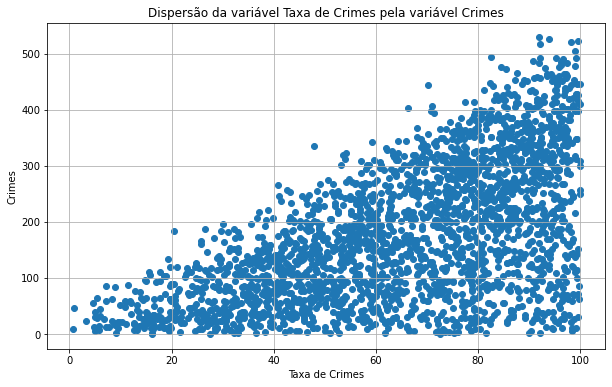

In [20]:
plt.figure(figsize = [10,6])
plt.title("Dispersão da variável Taxa de Crimes pela variável Crimes")
plt.scatter(df.taxa_crim, df.crimes)
plt.xlabel('Taxa de Crimes')
plt.ylabel('Crimes')
plt.grid()
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
X = df['taxa_crim']
y = df['crimes']

In [29]:
type(X), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

In [30]:
X = X.values.reshape(-1,1)
type(X), X.shape

(numpy.ndarray, (2460, 1))

In [31]:
y = y.values.reshape(-1,1)
type(y), y.shape

(numpy.ndarray, (2460, 1))

In [33]:
lm = LinearRegression()
lm

LinearRegression()

In [34]:
lm.fit(X, y)

LinearRegression()

In [35]:
ypred = lm.predict(X)
ypred

array([[169.17611762],
       [246.21649391],
       [265.90492072],
       ...,
       [243.64948388],
       [122.31828011],
       [175.7507535 ]])

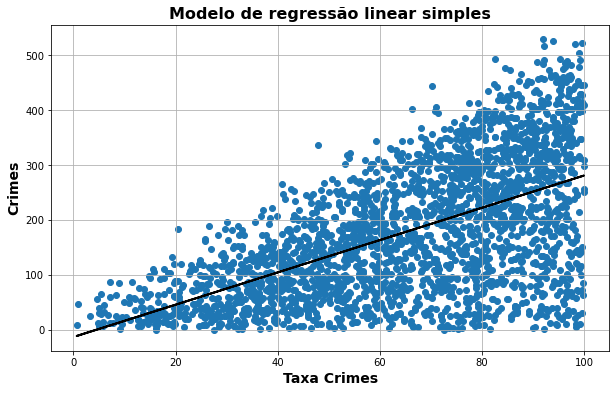

In [41]:
plt.figure(figsize=[10,6])
plt.title("Modelo de regressão linear simples", fontweight = 'bold', fontsize = 16)
plt.scatter(df['taxa_crim'], df['crimes'])
plt.xlabel("Taxa Crimes", fontweight = 'bold', fontsize = 14)
plt.ylabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.grid()

plt.plot(X, ypred, c = 'black', lw = 2)
plt.show()

In [43]:
# Verificando o erro
def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [44]:
RMSE(y = y, y_pred = ypred)

97.727039108692

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
X = df['taxa_crim']
y = df['crimes']

X_knn = X.values.reshape(-1,1)
type(X), X.shape

y_knn = y.values.reshape(-1,1)
type(y), y.shape

(pandas.core.series.Series, (2460,))

In [58]:
knn = KNeighborsRegressor(n_neighbors = 3)

In [59]:
knn.fit(X_knn, y_knn)

KNeighborsRegressor(n_neighbors=3)

In [61]:
knn_pred = knn.predict(X_knn)

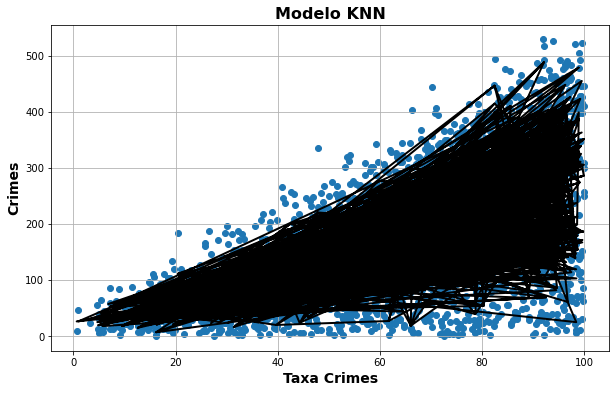

In [66]:
plt.figure(figsize=[10,6])
plt.title("Modelo KNN", fontweight = 'bold', fontsize = 16)
plt.scatter(df['taxa_crim'], df['crimes'])
plt.xlabel("Taxa Crimes", fontweight = 'bold', fontsize = 14)
plt.ylabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.grid()

plt.plot(X_knn, knn_pred, c = 'black', lw = 2)
plt.show()

In [63]:
def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [64]:
RMSE(y = y_knn, y_pred = knn_pred)

79.5942630018041

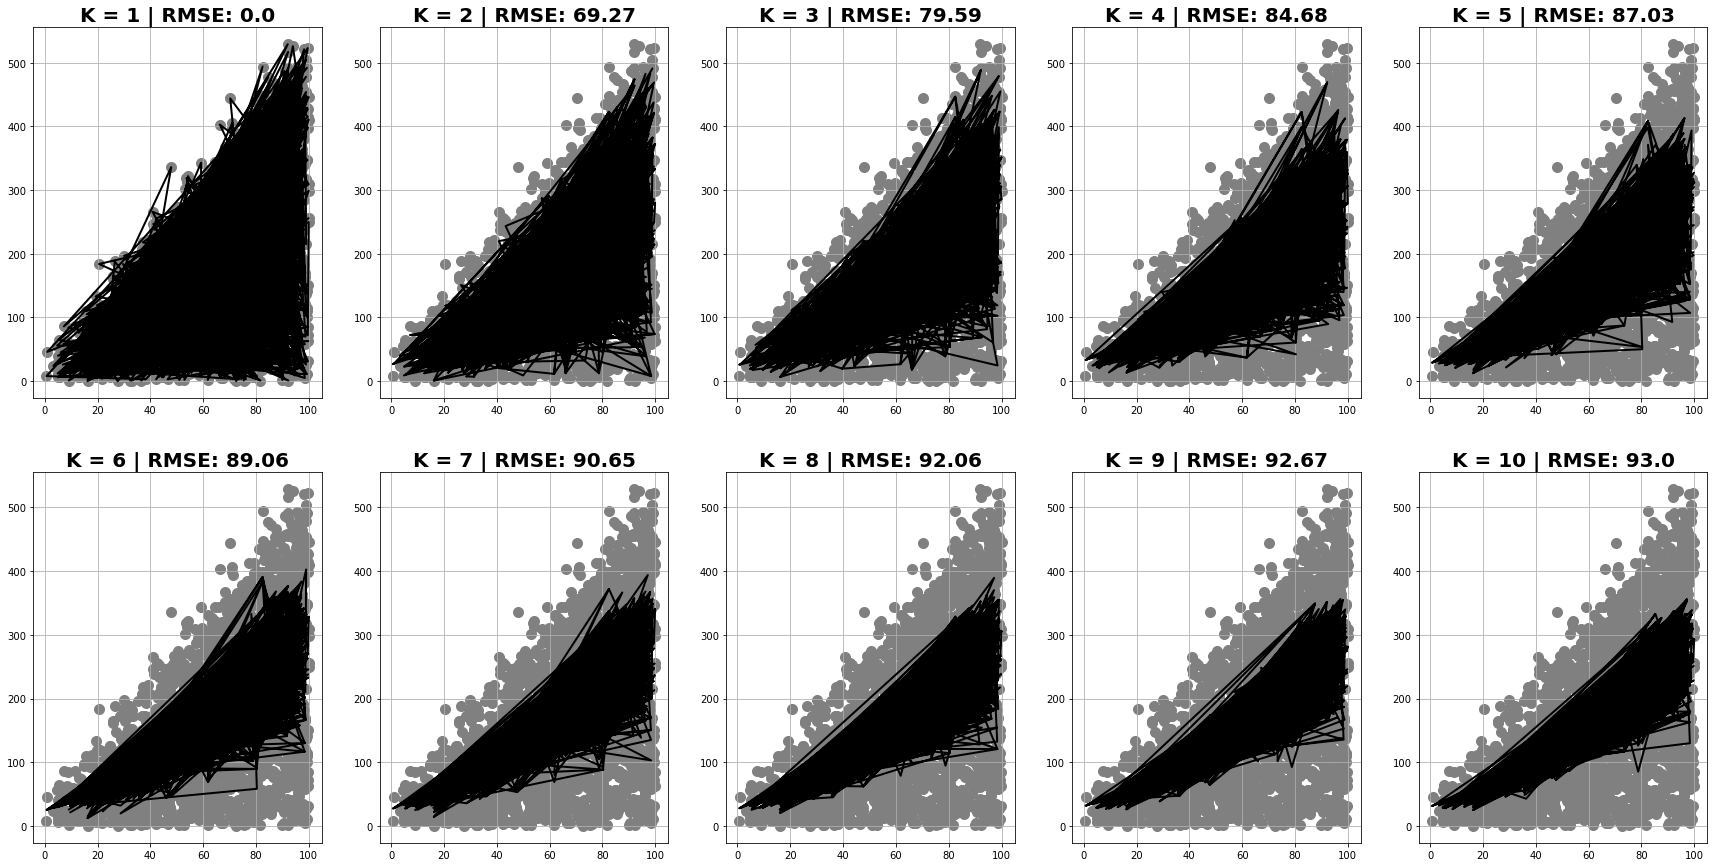

In [68]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_knn, y_knn)
    rmse_knn = np.round(RMSE(y = y_knn, y_pred = knn.predict(X_knn)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X_knn, knn.predict(X_knn), c = 'black', lw = 2)
    plt.scatter(df['taxa_crim'], df['crimes'], s = 100, c = 'gray')
    plt.grid()

plt.show()

## Comparando com os dados de teste

In [70]:
def plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo):
    
    modelo.fit(X, y)
    
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_novo = modelo.predict(Xnovo)
    
    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_novo = np.round(RMSE(y = ynovo, y_pred = predicao_dataset_novo), 2)
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, y, c = 'gray', s = 100)
    plt.plot(X, predicao_dataset_treino, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET NOVO: " + str(rmse_dataset_novo),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(Xnovo, ynovo, c = 'gray', s = 100)
    plt.plot(Xnovo, predicao_dataset_novo, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

In [71]:
X = df['taxa_crim'].values.reshape(-1,1)
y = df['crimes'].values
Xnovo = teste['taxa_crim'].values.reshape(-1,1)
ynovo = teste['crimes'].values

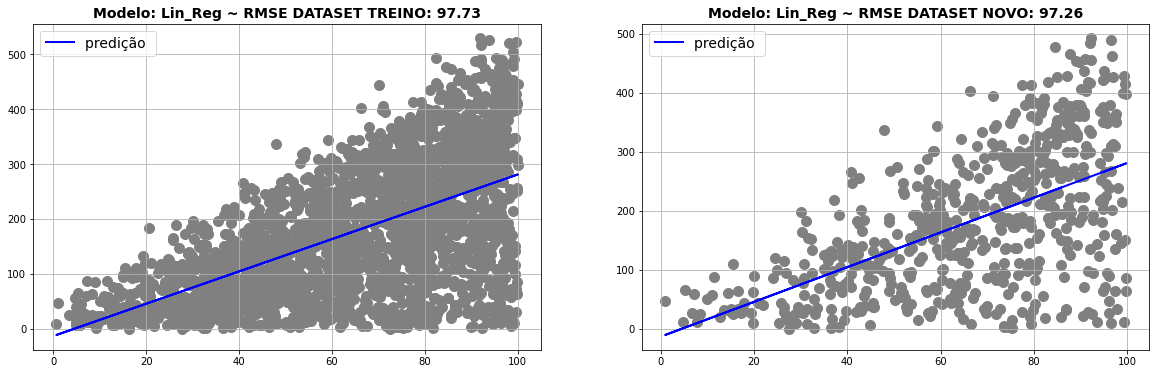

In [72]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

- Modelo de regressão parece descrever bem os dados de teste. 
- O RMSE continua similar ao do conjunto de dados de treino

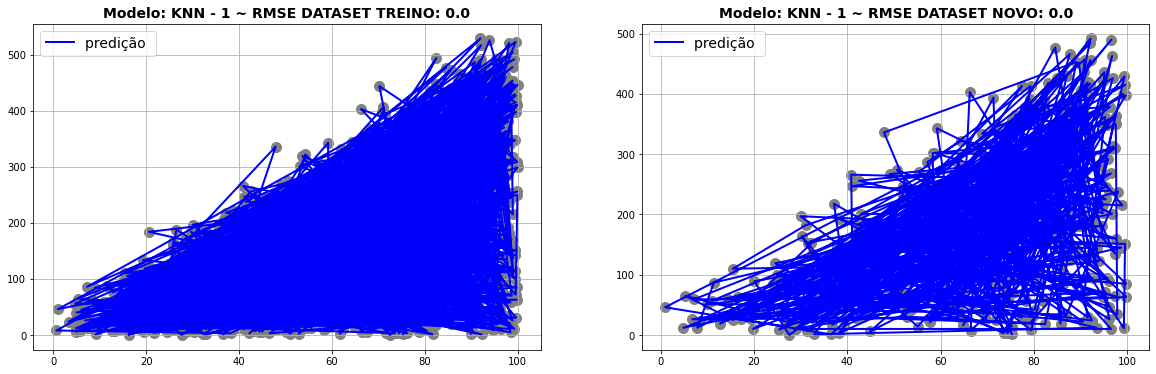

In [75]:
modelo = KNeighborsRegressor(n_neighbors = 1)
nome_modelo = 'KNN - 1'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

- Conforme os visto anteriormente, o modelo knn com 1 vizinho sofre de overfitting.

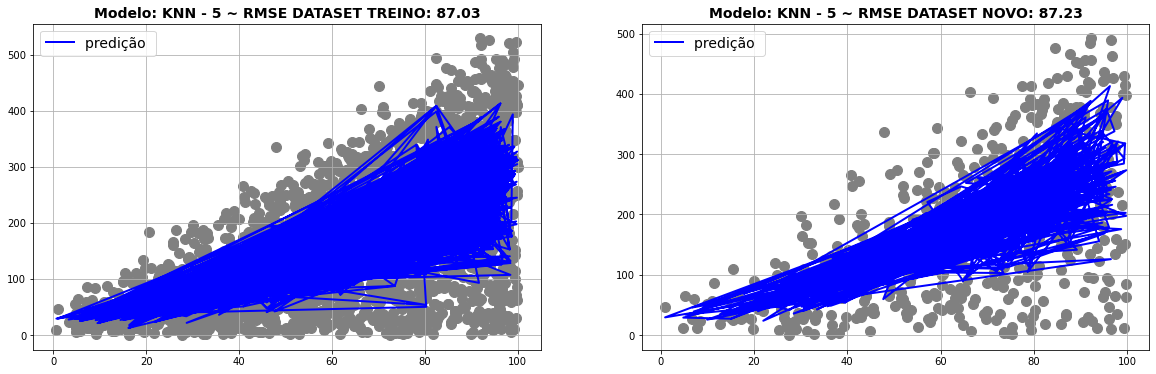

In [78]:
modelo = KNeighborsRegressor(n_neighbors = 5)
nome_modelo = 'KNN - 5'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

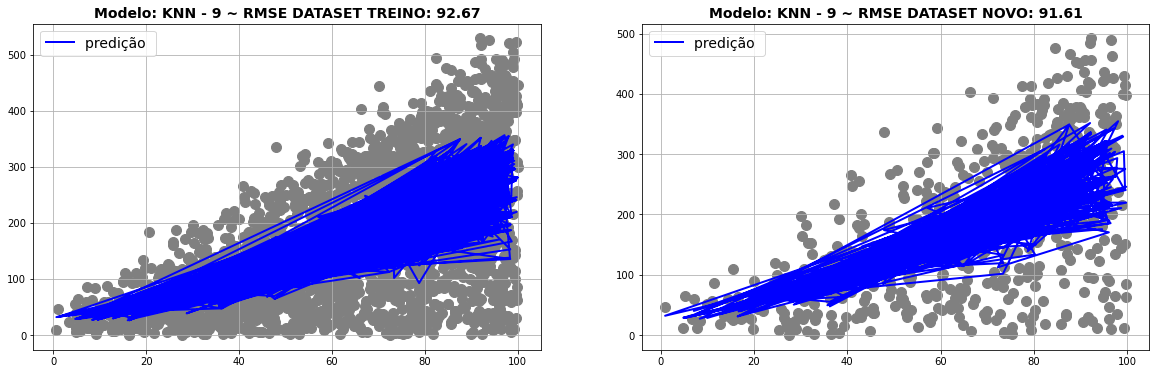

In [79]:
modelo = KNeighborsRegressor(n_neighbors = 9)
nome_modelo = 'KNN - 9'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

- No modelo Knn acontece uma tendencia de quanto mais o parametro (n_neighbors = 9) cresce o RMSE também cresce, os modelos com 1 vizinho a 3 vizinhos mostra nos graficos que estão sofrendo de overfitting, posteriormente os modelos se concentram basicamente na mesma região dos dados, que estão bem concentrados, mas pelo knn não é possível ver uma tendencia ou observar que algum modelo generalizou bem nos dados de teste.

## Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.